In [121]:
from myutils import *
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
%config InlineBackend.figure_format = 'retina'  # 提高 jupyter notebook 的圖形顯示解析度

In [122]:
pickle_file = '/home/wmnlab/jackbedford/udp-reliability-research/handover_profiling/20240417_1333007d66_new_data_sync_v2/sr/dl_lost/results/BR_20240417_1444000_d7cac_iter5.pkl'
with open(pickle_file, 'rb') as f:
    res_records = pickle.load(f)

def find_matching_element(data, criteria):
    for item in data:
        file_path = item[7]
        if all(criterion in file_path for criterion in criteria):
            return item
    return None

res_dirpath = '/home/wmnlab/F/results/20240417_1333007d66_new_data_sync_v2/sr/dl_lost/BR_20240417_1444000_d7cac_iter5'

In [123]:
selected_dates = data_loader(query_dates=True, show_info=False)
selected_dates = ["2024-03-19"]
filepaths = data_loader('sr', selected_dates=selected_dates, selected_bands=['All', 'B1B7'])
filepaths = [*filepaths[1:3], *filepaths[4:6]]
pprint(filepaths)

[[('sm01', 'All', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR'),
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/handover_info_log.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_dnlk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/udp_uplk_loss_latency.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/diag_log_sm01_2024-03-19_18-39-12_rrc.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/diag_log_sm01_2024-03-19_18-39-12_ml1.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm01/#01/data/diag_log_sm01_2024-03-19_18-39-12_nr_ml1.csv'],
 [('sm03', 'B1B7', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR'),
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm03/#01/data/handover_info_log.csv',
  '/home/wmnlab/F/database/2024-03-19/UDP_Bandlock_9S_Phone_BR/sm03/#01/

('sm01', 'All', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


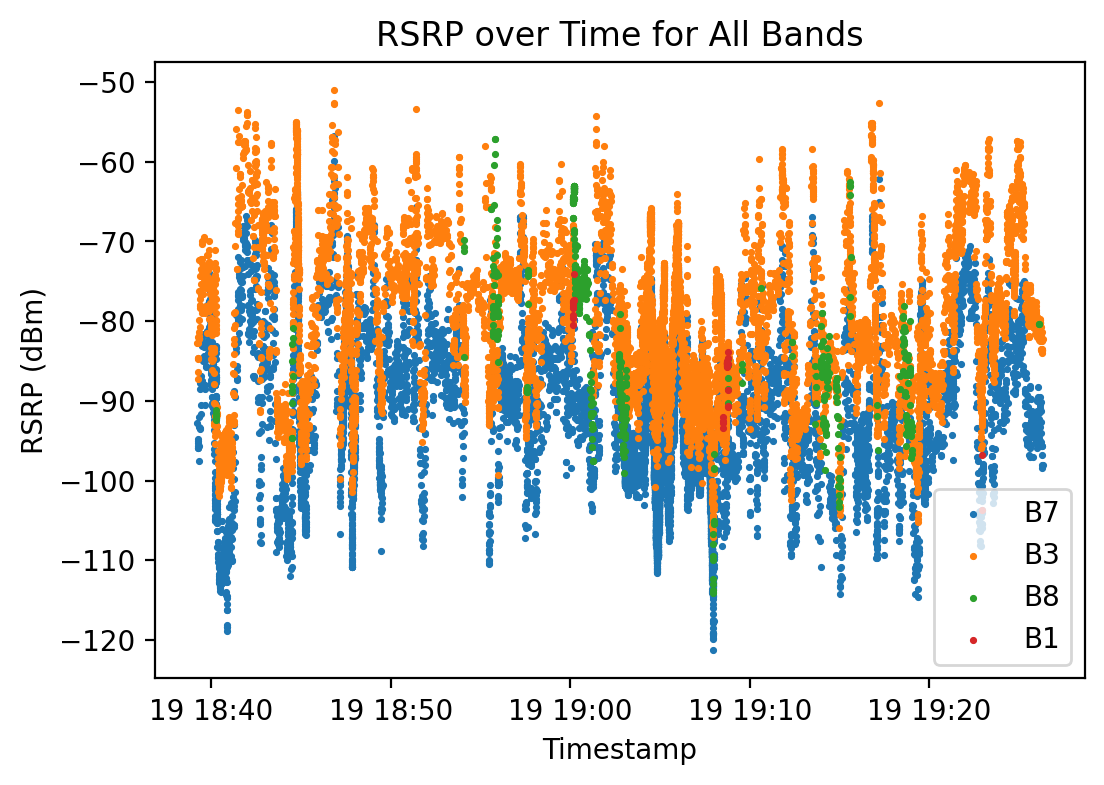

('sm03', 'B1B7', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


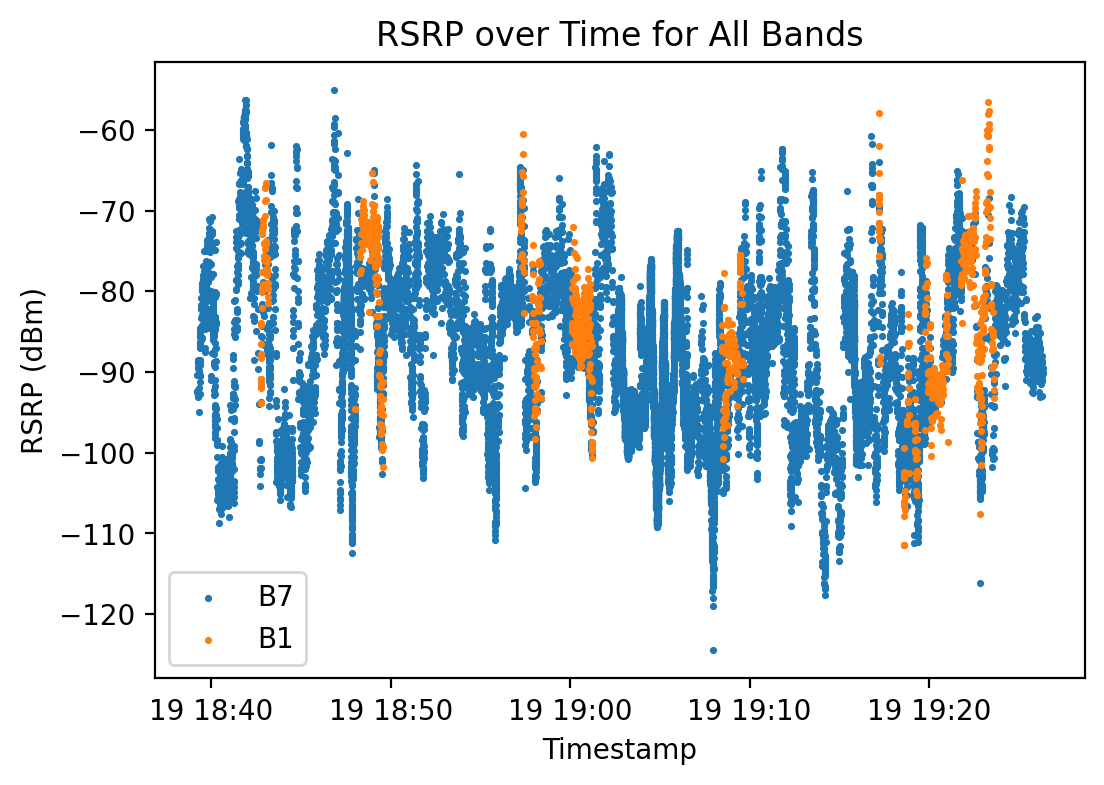

('sm01', 'All', '#02', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


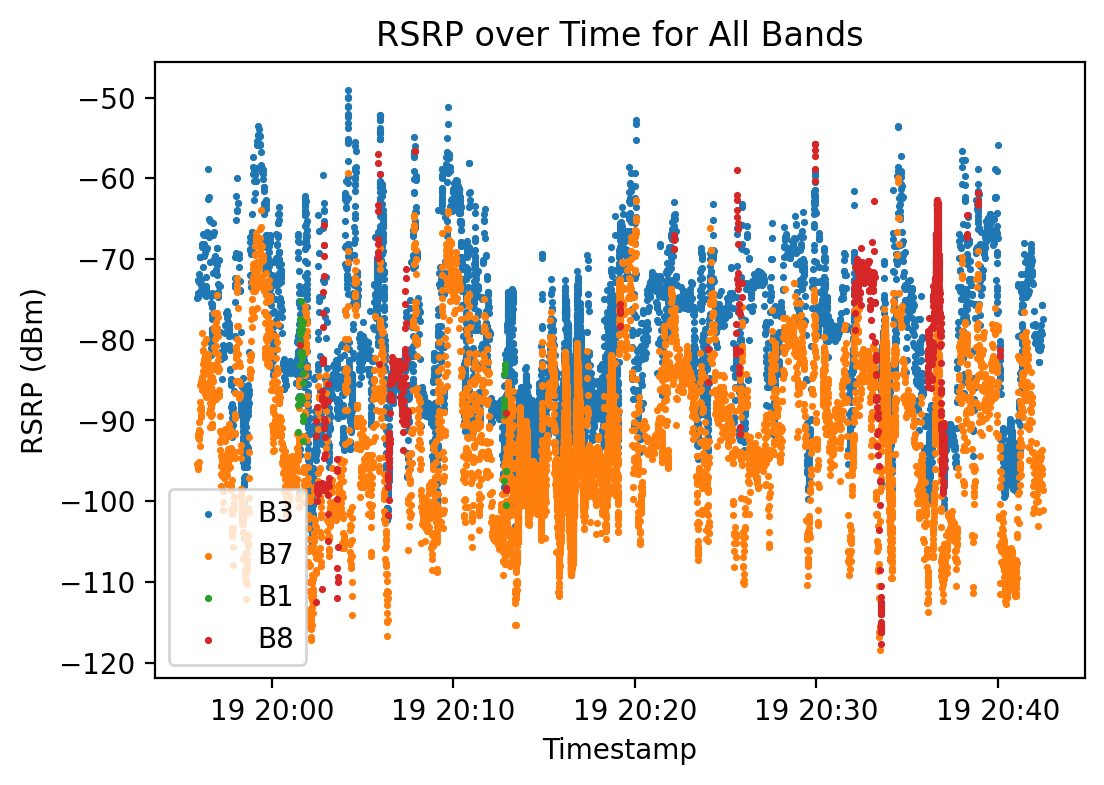

('sm03', 'B1B7', '#02', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


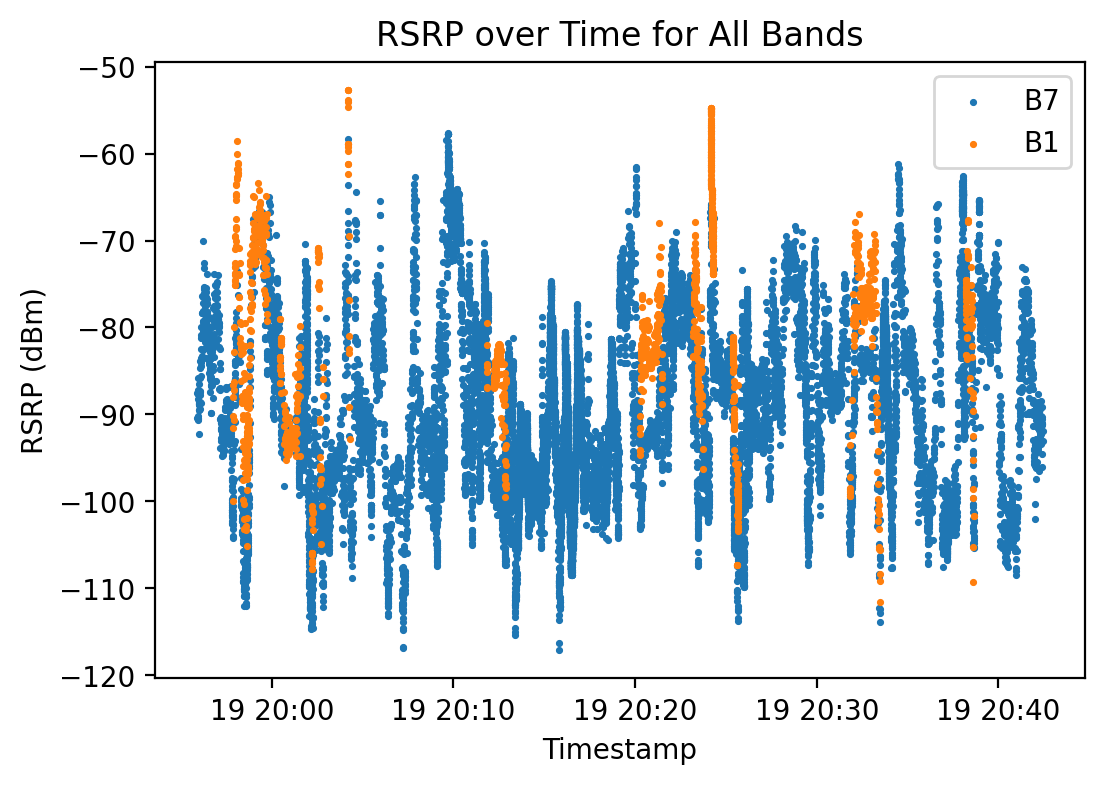

In [124]:
for filepath in filepaths:
    # filepath = filepaths[0]
    # rrc_df = gen_dataframe(filepath[4])
    eutra_df = set_data(gen_dataframe(filepath[5]), 'eutra')
    # nr_df = set_data(gen_dataframe(filepath[6]), 'nr')
    criteria = (filepath[0][0], *filepath[0][2:5])
    print(filepath[0])
    
    eutra_df['Band'] = eutra_df['EARFCN'].apply(lambda x: earfcn2band(x))
    eutra_df = eutra_df[eutra_df['RSRP'] != -30.0]
    
    eutra_df['PCI0'], eutra_df['RSRP0'], eutra_df['RSRQ0'] = eutra_df['PCI'].copy(), eutra_df['RSRP'].copy(), eutra_df['RSRQ'].copy()
    rsrp_columns = [col for col in eutra_df.columns if col.startswith('RSRP')][1:]
    bands = eutra_df[~eutra_df.duplicated(subset=['Band'])]['Band'].to_list()

    # 創建一個 figure 和 ax 對象
    fig, ax = plt.subplots(figsize=(6, 4))

    # 為每個 earfcn 繪圖
    for band in bands:
        tmp_df = eutra_df[eutra_df['Band'] == band].copy().reset_index(drop=True)[['Timestamp', 'Band', *rsrp_columns]]
        # 將 RSRP0, RSRP1, RSRP2, ... 取平均或最大值作為 RSRP column
        tmp_df['RSRP'] = tmp_df[rsrp_columns].max(axis=1)
        tmp_df = tmp_df.dropna(subset=['RSRP']).reset_index(drop=True)

        # 使用 ax 對象繪製每條線
        # ax.plot(tmp_df['Timestamp'], tmp_df['RSRP'], label=band)
        ax.scatter(tmp_df['Timestamp'], tmp_df['RSRP'], label=band, marker='.', s=10)

    # 設置圖表標題和軸標籤
    ax.set_title('RSRP over Time for All Bands')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('RSRP (dBm)')

    # 顯示圖例和網格
    ax.legend()
    # ax.grid(True)

    # 顯示圖表
    plt.show()


In [125]:
for filepath in filepaths:
    # filepath = filepaths[0]
    # rrc_df = gen_dataframe(filepath[4])
    eutra_df = set_data(gen_dataframe(filepath[5]), 'eutra')
    # nr_df = set_data(gen_dataframe(filepath[6]), 'nr')
    criteria = (filepath[0][0], *filepath[0][2:5])
    print(filepath[0])
    
    eutra_df['Band'] = eutra_df['EARFCN'].apply(lambda x: earfcn2band(x))
    eutra_df = eutra_df[eutra_df['RSRP'] != -30.0]
    
    eutra_df['PCI0'], eutra_df['RSRP0'], eutra_df['RSRQ0'] = eutra_df['PCI'].copy(), eutra_df['RSRP'].copy(), eutra_df['RSRQ'].copy()
    rsrp_columns = [col for col in eutra_df.columns if col.startswith('RSRP')][1:]
    bands = eutra_df[~eutra_df.duplicated(subset=['Band'])]['Band'].to_list()

    pcell_df = eutra_df[eutra_df['serv_cel_index'] == 'PCell'].copy().reset_index(drop=True)

    # Calculate time differences between consecutive rows
    pcell_df['Time_diff'] = pcell_df['Timestamp'].diff()

    # Replace the NaN in the first row's Time_diff with 0 (as timedelta)
    pcell_df.at[0, 'Time_diff'] = pd.Timedelta(seconds=0)

    # Group by 'Band' and sum the 'Time_diff'
    total_times = pcell_df.groupby('Band')['Time_diff'].sum()

    # Ensure all bands are included
    bands = ['B1', 'B3', 'B7', 'B8']
    total_times = total_times.reindex(bands, fill_value=pd.Timedelta(seconds=0))

    # Convert Timedelta to a more readable format (e.g., seconds or minutes)
    total_times_seconds = total_times.dt.total_seconds()

    # Create a DataFrame
    df = pd.DataFrame({
        'Band': bands,
        'Total Duration': total_times_seconds.map(lambda x: f"{pd.to_timedelta(x, unit='s')}")
    })

    # Calculate the total duration in seconds for percentage calculation
    total_duration_seconds = total_times_seconds.sum()

    # Calculate total duration in minutes and add to DataFrame
    df['Total Duration (min.)'] = (total_times_seconds / 60).map(lambda x: "{:.2f} min".format(x))

    # Calculate the percentage of total duration for each band
    df['Total Duration (%)'] = (total_times_seconds / total_duration_seconds * 100).map("{:.2f}%".format)

    # reset the index
    df = df.reset_index(drop=True)

    # Show the DataFrame
    display(df)

('sm01', 'All', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


,Band,Total Duration,Total Duration (min.),Total Duration (%)
0,B1,0 days 00:00:00,0.00 min,0.00%
1,B3,0 days 00:29:26.233046,29.44 min,62.50%
2,B7,0 days 00:16:12.818206,16.21 min,34.42%
3,B8,0 days 00:01:26.934143,1.45 min,3.08%


('sm03', 'B1B7', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


,Band,Total Duration,Total Duration (min.),Total Duration (%)
0,B1,0 days 00:00:00,0.00 min,0.00%
1,B3,0 days 00:00:00,0.00 min,0.00%
2,B7,0 days 00:47:06.931347,47.12 min,100.00%
3,B8,0 days 00:00:00,0.00 min,0.00%


('sm01', 'All', '#02', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


,Band,Total Duration,Total Duration (min.),Total Duration (%)
0,B1,0 days 00:00:00,0.00 min,0.00%
1,B3,0 days 00:33:21.777426,33.36 min,71.65%
2,B7,0 days 00:10:50.105339,10.84 min,23.27%
3,B8,0 days 00:02:21.870782,2.36 min,5.08%


('sm03', 'B1B7', '#02', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')


,Band,Total Duration,Total Duration (min.),Total Duration (%)
0,B1,0 days 00:00:01.394628,0.02 min,0.05%
1,B3,0 days 00:00:00,0.00 min,0.00%
2,B7,0 days 00:46:31.148931,46.52 min,99.95%
3,B8,0 days 00:00:00,0.00 min,0.00%


In [140]:
for filepath in filepaths:
    # filepath = filepaths[0]
    # rrc_df = gen_dataframe(filepath[4])
    eutra_df = set_data(gen_dataframe(filepath[5]), 'eutra')
    # nr_df = set_data(gen_dataframe(filepath[6]), 'nr')
    criteria = (filepath[0][0], *filepath[0][2:5])
    print(filepath[0])
    
    eutra_df['Band'] = eutra_df['EARFCN'].apply(lambda x: earfcn2band(x))
    eutra_df = eutra_df[eutra_df['RSRP'] != -30.0]
    
    eutra_df['PCI0'], eutra_df['RSRP0'], eutra_df['RSRQ0'] = eutra_df['PCI'].copy(), eutra_df['RSRP'].copy(), eutra_df['RSRQ'].copy()
    rsrp_columns = [col for col in eutra_df.columns if col.startswith('RSRP')][1:]
    bands = eutra_df[~eutra_df.duplicated(subset=['Band'])]['Band'].to_list()

    res_path = os.path.join(res_dirpath, filepath[2].replace('/', '\\'))
    data = gen_dataframe(res_path, parse_dates=['Timestamp'], usecols=['Timestamp', 'type', 'lost', 'Y_0', 'Y_1', 'Y_2', 'Y_3', 'Y_4'])
    data['Y'] = data[['Y_0', 'Y_1', 'Y_2', 'Y_3', 'Y_4']].sum(axis=1) >= 2

    # display(data)

    # Calculate the count of True values for each Y column
    true_counts = data[['Y_0', 'Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y']].sum()
    # print(true_counts)
    
    merged_data = pd.merge_asof(data, eutra_df[['Timestamp', 'Band']], on='Timestamp', direction='nearest')
    
    df = merged_data.copy()
    print(round(df['lost'].mean() * 100, 3))

    # Define the types you are interested in
    types = ['LTEH', 'ENBH', 'MCGH', 'MNBH', 'SCGM', 'SCGA', 'SCGR-I', 'SCGR-II', 'SCGC-I', 'SCGC-II', 'SCGF', 'MCGF', 'NASR', 'Stable']

    df['Duration'] = df['Timestamp'].diff().fillna(pd.Timedelta(seconds=0))

    # Group by 'type' and calculate required statistics
    result = df.groupby('type').agg(
        total_duration=pd.NamedAgg(column='Duration', aggfunc='sum'),
        count=pd.NamedAgg(column='type', aggfunc='size'),
        lost_rate=pd.NamedAgg(column='lost', aggfunc='mean'),
        y0_rate=pd.NamedAgg(column='Y_0', aggfunc='mean'),
        y1_rate=pd.NamedAgg(column='Y_1', aggfunc='mean'),
        y2_rate=pd.NamedAgg(column='Y_2', aggfunc='mean'),
        y3_rate=pd.NamedAgg(column='Y_3', aggfunc='mean'),
        y4_rate=pd.NamedAgg(column='Y_4', aggfunc='mean'),
        # y_rate=pd.NamedAgg(column='Y', aggfunc='mean')
    )

    # Calculate total duration in minutes
    result['total_duration (min.)'] = result['total_duration'].dt.total_seconds() / 60

    # Calculate the percentage of total duration
    total_duration_seconds = result['total_duration'].dt.total_seconds().sum()
    result['total_duration (%)'] = (result['total_duration'].dt.total_seconds() / total_duration_seconds) * 100

    # Ensure all types are represented in the result
    result = result.reindex(types, fill_value=0).reset_index()
    result.rename(columns={'index': 'type'}, inplace=True)

    # result[['lost_rate', 'y0_rate', 'y1_rate', 'y2_rate', 'y3_rate', 'y4_rate', 'y_rate']] = (result[['lost_rate', 'y0_rate', 'y1_rate', 'y2_rate', 'y3_rate', 'y4_rate', 'y_rate']] * 100).round(3)
    result[['lost_rate', 'y0_rate', 'y1_rate', 'y2_rate', 'y3_rate', 'y4_rate']] = (result[['lost_rate', 'y0_rate', 'y1_rate', 'y2_rate', 'y3_rate', 'y4_rate']] * 100).round(3)
    result[['total_duration (min.)', 'total_duration (%)']] = result[['total_duration (min.)', 'total_duration (%)']].round(2)
    del result['total_duration']

    # Print the result DataFrame
    display(result.sort_values(by='lost_rate', ascending=False))

('sm01', 'All', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')
1.67


,type,count,lost_rate,y0_rate,y1_rate,y2_rate,y3_rate,y4_rate,total_duration (min.),total_duration (%)
11,MCGF,38461,34.058,27.337,29.399,30.985,29.349,30.912,1.28,2.75
10,SCGF,6871,33.067,1.790,3.347,3.231,4.497,3.246,0.23,0.49
8,SCGC-I,2117,8.125,0.000,0.189,0.047,0.000,0.000,0.07,0.15
2,MCGH,27689,5.547,1.972,2.589,5.262,1.845,1.842,0.92,1.98
3,MNBH,121699,2.157,2.232,1.979,2.015,2.541,2.487,4.06,8.70
0,LTEH,3940,2.107,0.000,0.000,0.000,1.548,1.701,0.13,0.28
4,SCGM,280451,1.254,0.634,0.610,0.678,0.759,0.855,9.35,20.05
9,SCGC-II,9811,0.418,1.723,1.682,3.099,1.610,0.000,0.33,0.70
7,SCGR-II,12449,0.008,0.000,0.185,5.920,0.594,0.000,0.41,0.89
1,ENBH,4401,0.000,0.000,0.000,0.000,0.000,0.341,0.15,0.31


('sm03', 'B1B7', '#01', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')
1.117


,type,count,lost_rate,y0_rate,y1_rate,y2_rate,y3_rate,y4_rate,total_duration (min.),total_duration (%)
11,MCGF,32439,33.204,30.291,30.133,29.887,30.084,27.825,1.08,2.32
2,MCGH,28522,2.630,3.555,4.351,3.986,2.482,3.874,0.95,2.04
10,SCGF,16723,2.057,2.290,2.410,0.532,1.621,0.682,0.56,1.20
3,MNBH,106302,1.283,3.213,2.189,2.131,1.674,1.190,3.54,7.60
5,SCGA,9204,0.891,0.000,0.000,0.000,0.750,0.000,0.31,0.66
4,SCGM,268665,0.844,0.552,0.673,0.722,0.668,0.786,8.96,19.21
9,SCGC-II,7862,0.585,4.261,0.229,1.882,4.032,3.523,0.26,0.56
0,LTEH,721,0.000,0.000,0.000,0.000,0.000,0.000,0.02,0.05
1,ENBH,4141,0.000,0.000,0.000,0.000,0.000,0.411,0.14,0.30
6,SCGR-I,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00


('sm01', 'All', '#02', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')
1.467


,type,count,lost_rate,y0_rate,y1_rate,y2_rate,y3_rate,y4_rate,total_duration (min.),total_duration (%)
11,MCGF,42316,33.541,28.583,30.667,30.620,30.199,30.475,1.41,3.04
9,SCGC-II,11401,3.640,0.184,0.000,1.482,1.184,0.000,0.38,0.82
3,MNBH,102386,3.621,2.237,2.368,2.039,2.164,2.684,3.41,7.36
2,MCGH,30455,2.870,3.609,1.313,4.098,3.346,1.760,1.02,2.19
7,SCGR-II,6964,1.953,3.418,0.000,0.000,5.758,1.321,0.23,0.50
4,SCGM,244516,0.429,0.784,0.979,0.613,0.759,0.716,8.15,17.58
6,SCGR-I,4256,0.023,1.927,0.000,1.292,1.034,1.480,0.14,0.31
0,LTEH,5924,0.017,0.000,0.000,1.080,1.114,0.000,0.20,0.43
5,SCGA,10937,0.009,0.000,0.183,0.741,0.000,0.000,0.36,0.79
13,Stable,928045,0.004,0.080,0.043,0.039,0.031,0.038,30.94,66.72


('sm03', 'B1B7', '#02', '2024-03-19', 'UDP_Bandlock_9S_Phone_BR', 'BR')
0.999


,type,count,lost_rate,y0_rate,y1_rate,y2_rate,y3_rate,y4_rate,total_duration (min.),total_duration (%)
11,MCGF,33869,25.525,30.163,29.717,29.877,29.844,28.232,1.13,2.44
7,SCGR-II,14714,6.348,6.518,1.638,0.000,0.000,4.119,0.49,1.06
2,MCGH,34292,4.243,1.330,3.692,3.100,3.144,3.523,1.14,2.47
8,SCGC-I,3643,2.800,0.000,0.055,0.000,2.086,0.000,0.12,0.26
5,SCGA,11116,1.205,0.675,0.531,0.558,0.693,0.000,0.37,0.80
3,MNBH,109157,1.067,1.419,2.459,1.689,2.458,2.727,3.64,7.85
4,SCGM,247011,0.483,0.745,0.983,0.496,0.781,0.931,8.23,17.76
10,SCGF,4536,0.088,1.940,1.521,1.764,1.698,3.814,0.15,0.33
9,SCGC-II,9141,0.077,1.783,4.846,0.186,0.000,3.369,0.30,0.66
13,Stable,912219,0.028,0.058,0.067,0.057,0.055,0.058,30.41,65.58
